#### Importing Necessary Libraries/Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import missingno as msno

%matplotlib inline

#### Reading in the data

In [2]:
# Reading in the data (using full path due to location of this notebook - pretty far from the data files)
train = pd.read_csv('../data/starting_datasets/train.csv')
test  = pd.read_csv('../data/starting_datasets/test.csv')

### Exploratory Data Analysis (EDA)

#### Inspecting the data

In [3]:
#Making sure can look at all columns when do df.head()
pd.set_option("display.max_columns",81)

In [4]:
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


Note that the test dataset has one less column than the train dataset because the target variable (the sale price (SalePrice)) column is missing from the test dataset.

#### Inspecting Null Values in Training Dataset

In [7]:
# Columns with null values and their counts. (for the train dataset)
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = False) 
#supressed to compress Jupyter notebook
#Source: 
#Sam Stack helped with this

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [8]:
#train.info() #supressed this cell to compress the notebook

|Feature-Training Data|Feature Description|Type|No. of Null Values|Description about Null Value Meaning|
|---|---|---|---|---|
|Pool QC|Pool quality (excellent to poor)|Object|2042|NA means property does not have a pool| 
|Misc Feature|Miscellaneous feature not covered in other categories (such as elevator or shed)|Object|1986|NA means no misc. features|
|Alley|Type of alley access to property (gravel vs. paved)|Object|1911|NA means no alley access|
|Fence|Fence quality (good or min privacy, good or min wood/wire)|Object|1651|NA means no fence|
|Fireplace Qu|Fireplace quality (excellent to poor)|Object|1000|NA means no fireplace|
|Lot Frontage|Linear feet of street connected to property|Float|330|**NA has no meaning (actual missing value)**|
|Garage Yr Blt|Year garage was built|Float|114|**NA has no meaning (actual missing value)**|
|Garage Cond|Garage condition (excellent to poor)|Object|114|NA means no garage|
|Garage Qual|Garage quality (excellent to poor)|Object|114|NA means no garage|
|Garage Finish|Interior finish of the garage (finished, rough, or unfinished)|Object|114|NA means no garage|
|Garage Type|Garage location (attached, car port, etc)|Object|113|NA means no garage|
|Bsmt Exposure|Refers to walkout or garden level walls (good to no exposure)|Object|58|NA means no basement|
|BsmtFin Type 2| Rating of basement finished area, if mult. types (good to unfinished)|Object|56|NA means no basement|
|Bsmt Cond|Evaluates the gen. condition of the basement (excellent to poor)|Object|55|NA means no basement|
|Bsmt Qual|Evaluates the height of the basement (excellent to poor)|Object|55|NA means no basement|
|BsmtFin Type 1|Rating of basement finished area (good to unfinished)|Object|55|NA means no basement|
|Mas Vnr Type|Masonry veneer type (brick common to none)|Object|22|**NA may mean none (or missing value)**|
|Mas Vnr Area|Masonry veneer area in square feet|Float|22|**NA has no meaning (actual missing value)**|
|Bsmt Half Bath|Basement half bathrooms|Float|2|**NA has no meaning (actual missing value)**|
|Bsmt Full Bath|Basement full bathrooms|Float|2|**NA has no meaning (actual missing value)**|
|Garage Cars|Size of garage in car capacity|Float|1|**NA has no meaning (actual missing value)**|
|BsmtFin SF 1|Type 1 finished square feet|Float|1|**NA has no meaning (actual missing value)**|
|BsmtFin SF 2|Type 2 finished square feet|Float|1|**NA has no meaning (actual missing value)**|
|Bsmt Unf SF|Unfinished square feet of basement area|Float|1|**NA has no meaning (actual missing value)**|
|Garage Area|Size of garage in square feet|Float|1|**NA has no meaning (actual missing value)**|
|Total Bsmt SF|Total square feet of basement area|Float|1|**NA has no meaning (actual missing value)**|

Source: Dean De Cock, http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [9]:
#train[train['BsmtFin SF 1'].isnull()]

In [10]:
# Columns with null values and their counts. (for the test dataset)
test.isnull().sum()[test.isnull().sum() != 0].sort_values(ascending = False)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
dtype: int64

|Feature-Testing Data|Feature Description|Type|No. of Null Values|Description about Null Value Meaning|
|---|---|---|---|---|
|Pool QC|Pool quality (excellent to poor)|Object|875|NA means property does not have a pool| 
|Misc Feature|Miscellaneous feature not covered in other categories (such as elevator or shed)|Object|838|NA means no misc. features|
|Alley|Type of alley access to property (gravel vs. paved)|Object|821|NA means no alley access|
|Fence|Fence quality (good or min privacy, good or min wood/wire)|Object|707|NA means no fence|
|Fireplace Qu|Fireplace quality (excellent to poor)|Object|422|NA means no fireplace|
|Lot Frontage|Linear feet of street connected to property|Float|160|**NA has no meaning (actual missing value)**|
|Garage Yr Blt|Year garage was built|Float|45|**NA has no meaning (actual missing value)**|
|Garage Finish|Interior finish of the garage (finished, rough, or unfinished)|Object|45|NA means no garage|
|Garage Cond|Garage condition (excellent to poor)|Object|45|NA means no garage|
|Garage Qual|Garage quality (excellent to poor)|Object|45|NA means no garage|
|Garage Type|Garage location (attached, car port, etc)|Object|44|NA means no garage|
|Bsmt Exposure|Refers to walkout or garden level walls (good to no exposure)|Object|25|NA means no basement|
|BsmtFin Type 1|Rating of basement finished area (good to unfinished)|Object|25|NA means no basement|
|BsmtFin Type 2| Rating of basement finished area, if mult. types (good to unfinished)|Object|25|NA means no basement|
|Bsmt Cond|Evaluates the gen. condition of the basement (excellent to poor)|Object|25|NA means no basement|
|Bsmt Qual|Evaluates the height of the basement (excellent to poor)|Object|25|NA means no basement|
|Mas Vnr Type|Masonry veneer type (brick common to none)|Object|1|**NA may mean none (or missing value)**|
|Mas Vnr Area|Masonry veneer area in square feet|Float|1|**NA has no meaning (actual missing value)**|
|Electrical|Electrical system (standard circuit breakers to mized)|Object|1|**NA has no meaning (actual missing value)**|

Source: Dean De Cock, http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [11]:
#Visualizing null values in training set
#msno.matrix(train, labels = True);

In [12]:
#Visualizing null values in training set
#msno.matrix(test, labels = True);

In [13]:
#train.info() #Compressed to save space in Jupyter Notebook

Categorical values are listed as ordinal or nominal in the data dictionary (and there are 23 ordinal and 23 nominal variables). To find out what each categorical value represents, see the following data dictionary by Dean De Cock: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

#### Considering whether discrete values are better represented as categorical or continuous. 
(Looking at whether relationships to the target are linear)

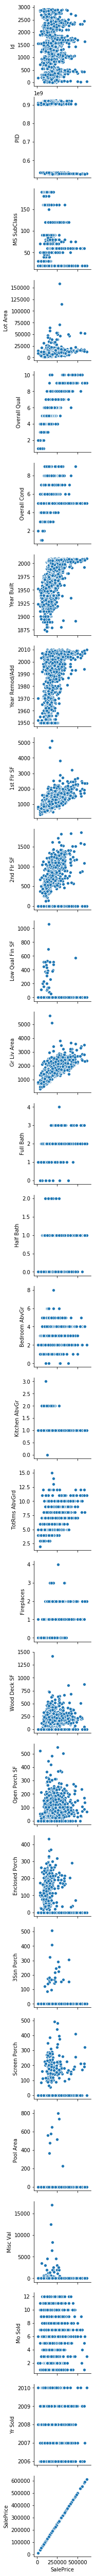

In [14]:
#List of integer variables (which have discrete values) found using train.info():
int_vars = ['Id', 'PID','MS SubClass',  'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',         
            'Year Remod/Add','1st Flr SF', '2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 
            'Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Wood Deck SF',       
            'Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch', 'Pool Area','Misc Val',           
            'Mo Sold',  'Yr Sold', 'SalePrice']          

#Looking at linearity of each variable vs. SalePrice to see which variables are better represented as 
#Categorical vs. Continuous:
sns.pairplot(train, x_vars = 'SalePrice', y_vars = int_vars)

Integer variables that could be better represented as categorical variables rather than continuous variablees (as shown in the pairplots above):
PID (espcially this variable), MS SubClass, Overall Qual, Overall Cond, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, TotRms AbvGrd, Fireplaces, MoSold, and Yr Sold

Float variables that could be better represented as categorical variables rather than continuous variablees (as shown in the pairplots in the next section):
Bsmt Full Bath, Bsmt Half Bath, and Garage Cars

#### Identifying Outliers

In the pairplots above, the following integer variables have obvious outliers:
Lot area, 1st Flr SF, Low Qual Fin SF, Gr Liv Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, and Misc Val

In the pairplots below, the following float variables have obvious outliers:
Lot Frontage, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Total Bsmt SF, and Garage Yr Blt       

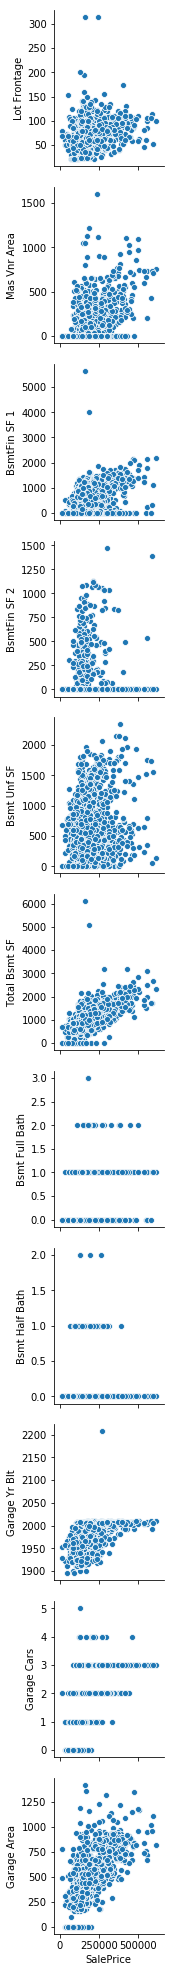

In [15]:
#Looking at variables that are float types - training data
float_vars = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF',      
              'Bsmt Full Bath', 'Bsmt Half Bath',  'Garage Yr Blt', 'Garage Cars', 'Garage Area']

#Looking at linearity of each variable vs. SalePrice and looking for obvious outliers 
sns.pairplot(train, x_vars = 'SalePrice', y_vars = float_vars)

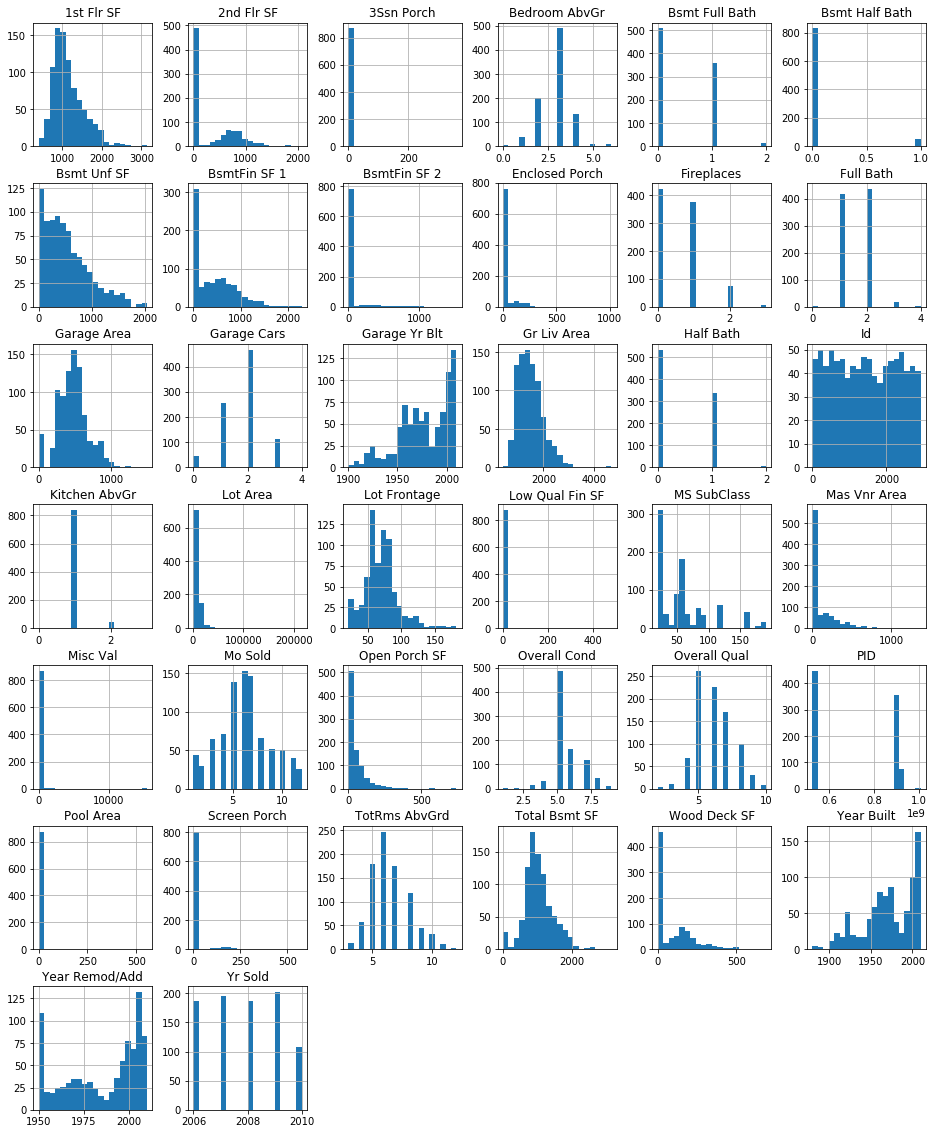

In [16]:
#Looking at histograms of numerical variables to see if outliers in test data:
test.hist(figsize=(16,20), bins = 20);

#Source: Jorian Stuckey helped to remember the histogram method

After inspecting the above histograms, it appears that the following variables in the test set have obvious outliers:
- 1st Flr SF
- 2nd Flr SF
- 3Ssn Porch
- Bsmt Unf SF
- BsmtFin SF 1
- BsmtFin SF 2
- Enclosed Porch
- Garage Area
- Garage Yr Blt
- Gr Liv Area
- Lot Area
- Lot Frontage
- Mas Vnr Area
- Open Porch SF
- Screen Porch
- Total Bsmt SF
- Wood Deck SF
- Year Built

#### Using a function to find columns with outliers in train and test sets

In [17]:
def detect_cols_with_outliers(df): #input argument: a dataframe
    numeric_cols = df._get_numeric_data().columns
    threshold=3 #if datapoint outside of 3 standard deviations, it is an outlier
    cols_with_outliers=[]
    for col in numeric_cols:    
        mean_col = np.mean(df[col])
        std_col =np.std(df[col])
        outliers_list = []
        for elem in df[col]:
            z_score= (elem - mean_col) / std_col

            if np.abs(z_score) > threshold:
                outliers_list.append(elem)    
        if len(outliers_list) > 0:
            cols_with_outliers.append(col)
    return(cols_with_outliers)

#Source:
#Renu Khandelwal, https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

In [18]:
#Using detect_cols_with_outliers function to find columns with outliers in train datafram
detect_cols_with_outliers(train)

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'SalePrice']

In [19]:
#Using detect_cols_with_outliers function to find columns with outliers in test datafram
detect_cols_with_outliers(test)

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Cond',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val']

Text(0, 0.5, 'Count (Frequency)')

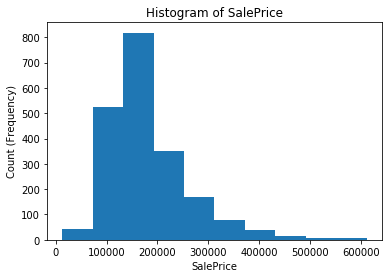

In [20]:
#Finding whether distribution of target variable (SalePrice) is skewed - training data:
plt.hist(train['SalePrice']);
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count (Frequency)')

Note that there is a positive (right) skew in the target variable (SalePrice) distribution.  This means the data should be Power Transformed after test_train_split.

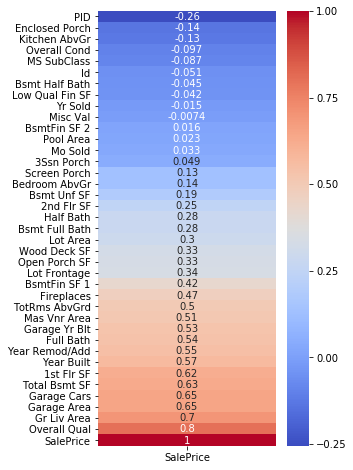

In [21]:
#Inspecting data to see what is most influencing SalePrice before data cleaning:
plt.figure(figsize = (4,8))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='coolwarm')

### Data Cleaning

#### Deciding how to impute null values

Looking at columns with null values and the null value counts for the training and testing datasets:

In [22]:
# Columns with null values and their counts.
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = False);
test.isnull().sum()[test.isnull().sum() != 0].sort_values(ascending = False)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 2     25
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
dtype: int64

#### Cleaning Train Dataset

Looking at the row with a null value for Garage Finish 

In [23]:
train[train['Garage Finish'].isnull()]; #supressed code to contain size of the notebook

The property with property ID (PID) 910201180 and index 1712 has null values for Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, and Garage Cond even though it has a Garage Type of Detached.  This means that there are several typos in this row.  This row (a single property) will therefore be removed from the dataframe. 

In [24]:
#Dropping row 1712 which has several typos:
train.drop([1712], inplace = True)

In [25]:
#Checking removed the appropriate row:
train.iloc[1710:1715];

Looking at the row with a null value for BsmtFin SF 1 (train set):

In [26]:
#Looking at row with null value for BsmtFin SF 1:
train[train['BsmtFin SF 1'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


The property with property ID (PID) 903230120 and index 1327 has several null values in basement-related columns.  This row will be left in the model, but it might be removed if it is problematic. 

Filling continuous variable BsmtFin SF 1 NaN value with 0 since NA in Bsmt Qual and other basement-related categorical variables mean the property does not have a basement (for train df)

In [27]:
train['BsmtFin SF 1'].fillna(0, inplace = True)

Looking at the row with null values for BsmtFin SF 2, Total Bsmt SF, and Bsmt Unf SF:

In [28]:
train[train['Total Bsmt SF'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


Filling continuous variable BsmtFin SF 2 NaN value with 0 since NA in Bsmt Qual and other basement-related
categorical variables mean the property does not have a basement 

In [29]:
train['BsmtFin SF 2'].fillna(0, inplace = True)

Filling continuous variable Total Bsmt SF NaN value with 0 since NA in Bsmt Qual and other basement-related
categorical variables mean the property does not have a basement (for train df)

In [30]:
train['Total Bsmt SF'].fillna(0, inplace = True)

Filling continuous variable Bsmt Unf SF NaN value with 0 since NA in Bsmt Qual and other basement-related
categorical variables mean the property does not have a basement (for train df)

In [31]:
train['Bsmt Unf SF'].fillna(0, inplace = True)

Looking at the 2 rows with null values for Bsmt Half Bath and Bsmt Full Bath:

In [32]:
train[train['Bsmt Half Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


The properties with property ID (PID) 908154080 and index 616 and PID 903230120 and index 1327 (both pretty old houses built before 1960) have several null values in basement-related columns.  These rows will be left in the model, but they might be removed if they are problematic.  The Bsmt Half Bath and Bsmt Full Bath values will be set to 0.0 (floats).  

Filling continuous variables Bsmt Half Bath and Bsmt Full Bath NaN values with '0.0' since NA in Bsmt Qual 
and other basement-related categorical variables mean the properties do not have basements (for train df)

In [33]:
train['Bsmt Half Bath'].fillna('0.0', inplace = True)
train['Bsmt Full Bath'].fillna('0.0', inplace = True)

Looking at the 22 rows with null values for Mas Vnr Type and Mas Vnr Area:

In [34]:
train[(train['Mas Vnr Type'].isnull()) & (train['Mas Vnr Area'].isnull())];

The properties with Mas Vnr Area null values also have a Mas Vnr Type of 'None.'  Other rows with Mas Vnr Type of 'None' have 0.0 values for Mas Vnr Area.  Therefore the NaN values in Mas Vnr Area will be replaced with 0.0 values.

Filling categorical variable Mas Vnr Type NaN values with 'None' since NA likely means the property does not 
have a masonry veneer 

In [35]:
train['Mas Vnr Type'].fillna('None', inplace = True)

Filling continuous variable Mas Vnr Area NaN values with 0.0 since these rows have NA values for 
Mas Vnr Type which likely means the properties do not have a masonry veneer  

In [36]:
train['Mas Vnr Area'].fillna(0.0, inplace = True)

Looking at the 55 rows with null values for Bsmt Qual, Bsmt Cond, and BsmtFin Type 1:

In [37]:
train[(train['Bsmt Qual'].isnull()) & (train['Bsmt Cond'].isnull()) & 
      (train['BsmtFin Type 1'].isnull()) & (train['Total Bsmt SF'] == 0)].shape

(55, 81)

The 55 properties with null values for Bsmt Qual, Bsmt Cond, and BsmtFin Type 1 all have square footage values of 0.0, so their values will be set as NA.

Filling categorical variable Bsmt Qual NaN values with 'NA' since NA means the property does not have a 
basement (for train df)

In [38]:
train['Bsmt Qual'].fillna('NA', inplace = True)

Filling categorical variable Bsmt Cond NaN values with 'NA' since NA means the property does not have a 
basement (for train df)

In [39]:
train['Bsmt Cond'].fillna('NA', inplace = True)

Filling categorical variable BsmtFin Type 1 NaN values with 'NA' since NA means the property does not have a 
basement (for train df)

In [40]:
train['BsmtFin Type 1'].fillna('NA', inplace = True)

Looking at the 56 rows with null values for Mas Vnr Type and Mas Vnr Area:

In [41]:
train[train['BsmtFin Type 2'].isnull()];
train[(train['BsmtFin Type 2'].isnull()) & (train['Bsmt Cond'] != 'NA')]
#train[(train['Bsmt Qual'] == 'Gd') & (train['Bsmt Cond'] == 'TA') & 
#      (train['BsmtFin Type 1'] == 'GLQ')]
# train[(train['Bsmt Qual'] == 'Gd') & (train['Bsmt Cond'] == 'TA') & 
#        (train['BsmtFin Type 1'] == 'GLQ') & (train['Year Built'] == 2003) & 
#        (train['Year Remod/Add']==2004) & (train['SalePrice'] == 284000)]
#train[(train['Bsmt Qual'] == 'Gd') & (train['Bsmt Cond'] == 'TA') & 
#       (train['BsmtFin Type 1'] == 'GLQ') & (train['BsmtFin SF 2'] > 0)]['BsmtFin Type 2'].value_counts()
#train[(train['Bsmt Qual'] == 'Gd') & (train['Bsmt Cond'] == 'TA') & 
#      (train['BsmtFin Type 1'] == 'GLQ')]['BsmtFin Type 2'].value_counts()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,445,528142130,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000


There is only one property (PID: 528142130 and index 1147) with a basement (instead of with no basement as depicted by an 'NA' value in the Bsmt Cond column) that has a null value in the BsmtFin Type 2 column.  The Basement quality is good, the basement condition is typical, and the basement finish type 1 is GLQ (good living quarters).  Other properties with good basement quality, typical basement condition, GLQ basement finish type 1, and BsmtFin SF 2 values greater than 0 have BsmtFin Type 2 values of Rec, ALQ, LwQ, BLQ, or Unf.  It is hard to predict what the value should be for this property's BsmtFin Type 2, so this row will be removed.

Dropping row 1147 which has several typos:

In [42]:
train.drop([1147], inplace = True)

Checking removed the appropriate row:

In [43]:
train[1145:1150]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1145,2684,903235020,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,616.0,Unf,0.0,0.0,616.0,GasA,Gd,Y,SBrkr,616,0,0,616,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1921.0,Unf,1.0,205.0,TA,TA,Y,0,0,129,0,0,0,NaN,NaN,NaN,0,6,2006,WD,89000
1146,13,527166040,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,180400
1148,1914,535106140,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456.0,Unf,0.0,456.0,912.0,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1.0,275.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,114500
1149,2811,907410110,20,RL,84.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24.0,Unf,0.0,1528.0,1552.0,GasA,Ex,Y,SBrkr,1552,0,0,1552,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,RFn,3.0,782.0,TA,TA,Y,144,20,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,212900
1150,850,907194110,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1413.0,1413.0,GasA,Ex,Y,SBrkr,1430,0,0,1430,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,RFn,2.0,605.0,TA,TA,Y,0,33,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,187100


Investigating whether the rows with null values for BsmtFin Type 2 have basements (if the value in the
Total Bsmt SF column in these rows is 0, it is assumed that there is no basement)

In [44]:
train[(train['BsmtFin Type 2'].isnull()) & (train['Total Bsmt SF'] == 0)].shape

(55, 81)

Filling categorical variable BsmtFin Type 2 NaN values with 'NA' since NA means the property does not have a 
basement (for train df)

In [45]:
train['BsmtFin Type 2'].fillna('NA', inplace = True)

Investigating whether the rows with null values for BsmtFin Type 2 have basements (if the value in the
Total Bsmt SF column in these rows is 0, it is assumed that there is no basement)

In [46]:
train[(train['Bsmt Exposure'].isnull()) & (train['Total Bsmt SF'] != 0)]
train[(train['Total Bsmt SF'] != 0) & (train['Bsmt Qual'] == 'Gd') &
      (train['Bsmt Cond'] == 'TA') & (train['BsmtFin Type 1'] == 'Unf') &
      (train['BsmtFin SF 1'] == 0) & (train['BsmtFin Type 2'] == 'Unf') &
      (train['BsmtFin SF 2'] == 0)& (train['Year Remod/Add'] >= 2002)]['Bsmt Exposure'].value_counts()

No    110
Av     35
Gd      8
Mn      7
Name: Bsmt Exposure, dtype: int64

In [47]:
train[(train['Bsmt Exposure'].isnull()) & (train['Total Bsmt SF'] != 0)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0,0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


There are three properties (idices 1456 (PID: 528458090), 1547 (PID: 528445060), and 1997 (PID: 907194130) with null values for Bsmt Exposure while the Total Bsmt SF is greater than 0.  This means that there properties have basements, so a value needs to be added for Bsmt Exposure.  All of these rows had Total Bsmt SF not equal to 0, good (Gd) Bsmt Qual, typical Bsmt Cond, unfinished (unf) BsmtFin Type 1, BsmtFin SF 1 of 0 ft sq, unfinished (unf) BsmtFin Type 2, BsmtFin SF 2 of 0 ft sq, and they were remodeled/added to during or after 2002.  Rows with these conditions were investigated, and the most common Bsmt Exposure value among these rows was "No."  Therefore, NaN values in the Bsmt Exposure columns for these rows will be replaced with "No."  If this becomes problematic, it will be reassessed.  

In [48]:
train.loc[(train['PID'] == 528458090),['Bsmt Exposure']] = 'No' 

#Format used:
#df.loc[df[<some_column_name>] == <condition>, [<another_column_name>]] = <value_to_add>
#Soure: https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

In [49]:
train.loc[(train['PID'] == 528445060),['Bsmt Exposure']] = 'No'

In [50]:
train.loc[(train['PID'] == 907194130),['Bsmt Exposure']] = 'No'

In [51]:
#Checking work:
train.loc[(train['PID'] == 528458090),'Bsmt Exposure'] 

1456    No
Name: Bsmt Exposure, dtype: object

In [52]:
#Checking work:
train.loc[(train['PID'] == 528445060),'Bsmt Exposure']

1547    No
Name: Bsmt Exposure, dtype: object

In [53]:
#Checking work:
train.loc[(train['PID'] == 907194130),'Bsmt Exposure']

1997    No
Name: Bsmt Exposure, dtype: object

Checking that the remaining null Bsmt Exposure values have Total Bsmt SF of 0 and therefore no basement exists
for these properties

In [54]:
train[(train['Bsmt Exposure'].isnull()) & (train['Total Bsmt SF'] != 0)].shape

(0, 81)

Filling categorical variable Bsmt Exposure NaN values with 'No' since NA means the property does not have a 
basement (for train df)

In [55]:
train['Bsmt Exposure'].fillna('No', inplace = True)

Checking that the properties (rows) with null values in Garage Cond also have null values in Garage Qual and 
Garage Finish and Garage Yr Blt and Garage Type

In [56]:
train[(train['Garage Cond'].isnull()) & (train['Garage Qual'].isnull()) & (train['Garage Finish'].isnull()) &
      (train['Garage Yr Blt'].isnull()) & (train['Garage Type'].isnull())].shape

(113, 81)

Checking that the properties with null values in Garage Cond, Garage Qual, Garage Finish,
Garage Yr Blt, and Garage Type also don't have a garage (Garage Area = 0)

In [57]:
train[(train['Garage Cond'].isnull()) & (train['Garage Qual'].isnull()) & (train['Garage Finish'].isnull()) &
      (train['Garage Yr Blt'].isnull()) & (train['Garage Type'].isnull()) & (train['Garage Area'] == 0)].shape

(113, 81)

Filling categorical variable Garage Cond NaN values with 'NA' since NA means the property does not have a garage
(for train df)

In [58]:
train['Garage Cond'].fillna('NA', inplace = True)

Filling categorical variable Garage Qual NaN values with 'NA' since NA means the property does not have a garage
(for train df)

In [59]:
train['Garage Qual'].fillna('NA', inplace = True)

Filling categorical variable Garage Finish NaN values with 'NA' since NA means the property does not have a 
garage (for train df)

In [60]:
train['Garage Finish'].fillna('NA', inplace = True)

Filling categorical variable Garage Type NaN values with 'NA' since NA means the property does not have a 
garage (for train df)

In [61]:
train['Garage Type'].fillna('NA', inplace = True)

Investigating rows with null values for Garage Yr Blt: (will leave the null values in the column for now - thinking about removing the column since it is hard to fill these rows without corrupting data)

In [62]:
#train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median(), inplace = True)
#Decided to leave the NaN values in 'Garage Yr Blt' to not change the data in that column

Checking that all properties with null values for Fireplace Qu do not have fireplaces

In [63]:
train[(train['Fireplace Qu'].isnull()) & (train['Fireplaces'] == 0)].shape

(999, 81)

Filling categorical variable Fireplace Qu NaN values with 'NA' since NA means the property does not have a 
fireplace (for train and test df's)

In [64]:
train['Fireplace Qu'].fillna('NA', inplace = True)

Checking that all properties with null values for Fence do not have fences by checking if any NA value for
Fence already (looks like NA was changed to NaN when imported data)

In [65]:
train[train['Fence'] == 'NA']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


Filling categorical variable Fence NaN values with 'NA' since NA means the property does not have a fence
(for train and test df's)

In [66]:
train['Fence'].fillna('NA', inplace = True)

Checking that all properties with null values for Alley do not have alleys by checking if any NA value for
Alley already (looks like NA was changed to NaN when imported data)

In [67]:
train[train['Alley'].isnull()];
train[train['Alley'] == 'NA']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


Filling categorical variable Alley NaN values with 'NA' since NA means the property does not have alley access
(for train and test df's)

In [68]:
train['Alley'].fillna('NA', inplace = True)

Checking that all properties with null values for Misc Features do not have Misc Features by checking if any NA 
value for Misc Feature already (looks like NA was changed to NaN when imported data)

In [69]:
train[train['Misc Feature'].isnull()];
train[train['Misc Feature'] == 'NA']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


Filling categorical variable Misc Feature NaN values with 'NA' since NA means the property has no misc. features
(for train and test df's)

In [70]:
train['Misc Feature'].fillna('NA', inplace = True)

Checking that all properties with null values for Pool QC do not have pools by checking if any pool 
square footage (if values are 0 sq ft, there are no pools and therefor Pool QC should be 'NA')

In [71]:
train[(train['Pool QC'].isnull()) & (train['Pool Area'] == 0)].shape

(2040, 81)

Filling categorical variable Pool QC NaN values with 'NA' since NA means the property has no pool 
(for train and test df's)

In [72]:
train['Pool QC'].fillna('NA', inplace = True)

It is assumed that Lot Frontage depends on Lot Shape.  The .groupby method will be used to inspect the median Lot Frontage value for each Lot Shape.  It will then find the Lot Shape for each property and place the median Lot Frontage for that Lot Shape into the cell where there is a null Lot Frontage value.

In [73]:
train['Lot Frontage'] = train.groupby('Lot Shape').transform(lambda elem: elem.fillna(elem.median()))
#Source: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

Checking only have null values in Garage Yr Blt column

In [74]:
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = False)

Garage Yr Blt    113
dtype: int64

Removing Garage Yr Blt column from train dataframe because the Garage Yr Blt values were very hard to infer from contextual data of properties.

In [75]:
train.drop(labels = 'Garage Yr Blt', axis = 1, inplace = True)

#Checking work:
train.head()

#Source:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,109,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,544,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,153,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,318,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,255,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


Checking there are no null values left in the train dataset

In [76]:
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = False)

Series([], dtype: int64)

#### Cleaning Test Dataset

Using contextual information to fill null values (or to remove a column) - similar process to train set cleaning process:

Looking at the row with a null value for Electrical

In [77]:
test[(test['Electrical'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD


Using the groupby method to fill a null Electrical value using the test dataset's mode of the Electrical value for this row's corresponding Utilities value. 

In [78]:
test['Electrical'] = test.groupby('Utilities').transform(lambda elem: elem.fillna(elem.mode()))
#Source: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [79]:
test[(test['Mas Vnr Area'].isnull()) & (test['Mas Vnr Type'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
866,868,907260030,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,868,840,885,0,1725,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2,550,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD


In [80]:
test['Mas Vnr Area'].fillna(0, inplace = True)

In [81]:
test['Mas Vnr Type'].fillna('None', inplace = True)

In [82]:
test[(test['BsmtFin Type 2'].isnull()) & (test['BsmtFin Type 1'].isnull()) & (test['Bsmt Exposure'].isnull()) &
     (test['Bsmt Cond'].isnull()) & (test['Bsmt Qual'].isnull()) & (test['Total Bsmt SF'] == 0)].shape

(25, 80)

In [83]:
test['BsmtFin Type 2'].fillna('NA', inplace = True)

In [84]:
test['BsmtFin Type 1'].fillna('NA', inplace = True)

In [85]:
test['Bsmt Exposure'].fillna('NA', inplace = True)

In [86]:
test['Bsmt Cond'].fillna('NA', inplace = True)

In [87]:
test['Bsmt Qual'].fillna('NA', inplace = True)

In [88]:
#Looking at 45 rows with null values for Garage Finish (for test set):
test[(test['Garage Finish'].isnull())];

In [89]:
#Looking at 45 rows with null values for Garage Finish (for test set):
test[(test['Garage Cond'].isnull()) & (test['Garage Qual'].isnull()) & (test['Garage Finish'].isnull()) &
     (test['Garage Yr Blt'].isnull()) & (test['Garage Type'].isnull()) & (test['Garage Area'] == 0)].shape

(44, 80)

In [90]:
test[(test['Garage Cond'].isnull()) & (test['Garage Qual'].isnull()) & (test['Garage Finish'].isnull()) &
     (test['Garage Yr Blt'].isnull()) & (test['Garage Type'] == 'Detchd')]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
765,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,1357,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD


Finding the mode of Garage Cond when the Garage Type is detached then filling a missing Garage Cond value manually using this mode of Garage Cond when the Garage Type was detached:

In [91]:
test[test['Garage Type'] == 'Detchd']['Garage Cond'].value_counts()

TA    212
Fa     24
Po      6
Gd      2
Ex      1
Name: Garage Cond, dtype: int64

In [92]:
test.at[765, 'Garage Cond'] = 'TA'

In [93]:
test[test['Garage Type'] == 'Detchd']['Garage Qual'].value_counts()

TA    203
Fa     37
Po      3
Gd      2
Name: Garage Qual, dtype: int64

In [94]:
test.at[765, 'Garage Qual'] = 'TA'

Finding the mode of Garage Finish when the Garage Type is detached then filling a missing Garage Cond value manually using this mode of Garage Finish when the Garage Type was detached:

In [95]:
test[test['Garage Type'] == 'Detchd']['Garage Finish'].value_counts()

Unf    223
Fin     12
RFn     10
Name: Garage Finish, dtype: int64

In [96]:
test.at[765, 'Garage Finish'] = 'Unf'

In [97]:
#Looking at 45 rows with null values for Garage Finish (for test set):
test[(test['Garage Cond'].isnull()) & (test['Garage Qual'].isnull()) & (test['Garage Finish'].isnull()) &
     (test['Garage Yr Blt'].isnull()) & (test['Garage Type'].isnull()) & (test['Garage Area'] == 0)].shape

(44, 80)

In [98]:
test['Garage Cond'].fillna('NA', inplace = True)

In [99]:
test['Garage Qual'].fillna('NA', inplace = True)

In [100]:
test['Garage Finish'].fillna('NA', inplace = True)

In [101]:
test['Garage Type'].fillna('NA', inplace = True)

In [102]:
test[(test['Fireplace Qu'].isnull()) & (test['Fireplaces'] == 0)].shape

(422, 80)

In [103]:
test['Fireplace Qu'].fillna('NA', inplace = True)

In [104]:
#test[(test['Fence'].isnull())]
test[test['Fence'] == 'NA']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [105]:
test['Fence'].fillna('NA', inplace = True)

In [106]:
#test[(test['Alley'].isnull())]
test[test['Alley'] == 'NA']

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [107]:
test['Alley'].fillna('NA', inplace = True)

In [108]:
test[(test['Misc Feature'].isnull()) & (test['Misc Val'] == 0)].shape

(838, 80)

In [109]:
test['Misc Feature'].fillna('NA', inplace = True)

In [110]:
test[(test['Pool QC'].isnull()) & (test['Pool Area'] == 0)].shape

(875, 80)

In [111]:
test['Pool QC'].fillna('NA', inplace = True)

In [112]:
test['Lot Frontage'] = test.groupby('Lot Shape').transform(lambda elem: elem.fillna(elem.median()))
#Source: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [113]:
test.drop(labels = 'Garage Yr Blt', axis = 1, inplace = True)

#Checking work:
test.head()

#Source:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,2658.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,2658,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,2718.0,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,2718,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,2414.0,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,2414,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,1989.0,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,1989,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,625.0,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,625,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [114]:
test.isnull().sum()[test.isnull().sum() != 0].sort_values(ascending = False)

Series([], dtype: int64)

In [115]:
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = False)

Series([], dtype: int64)

In [116]:
train.shape

(2049, 80)

In [117]:
test.shape

(879, 79)

In [118]:
train.to_csv('../data/train_clean_2.csv', index = False)

In [119]:
test.to_csv('../data/test_clean_2.csv', index = False)

In [120]:
#train.info()  #Supressed to compress notebook

#### An attempt to replace null Lot Frontage values with predictions using linear regression (showing tried this but did not use it):

In [121]:
#plt.scatter(train['Lot Area'],train['Lot Frontage']);

In [122]:
#plt.scatter(train['1st Flr SF'],train['Lot Frontage']);

In [123]:
#train[train['Lot Frontage'].isna()]['1st Flr SF'].value_counts();

In [124]:
# train[train['Lot Frontage'].isna()]['Lot Area'].value_counts();

In [125]:
# # Creating a boolean column to represent colums that DO NOT have a lot frontage value.
# train['No_LtFrg'] = train['Lot Frontage'].apply(lambda x : 0 if x >=0 else 1 )
# #0 if have value for lot frontage
# #1 if null value for lot frontage

# #Source: Sam Stack helped with this

In [126]:
# train['No_LtFrg'].value_counts()

In [127]:
# Validate that data has been cleaned properly.  
#plt.figure(figsize =(4,60))
#sns.heatmap(pd.get_dummies(train).corr()[['No_LtFrg']
#            ].sort_values(by = 'No_LtFrg', ascending = False,),
#            annot=True,
#            cmap = 'viridis')

In [128]:
# #Creating dataframe of the data want to look at
# lot_data = train[['1st Flr SF','Lot Area','Lot Frontage']]
# lot_data.head()

In [129]:
# # This is the set of data with nulls for Lot Frontage
# target_set = lot_data[lot_data['Lot Frontage'].isna()]
# target_set.head()

In [130]:
# # Set of data where lot frontage is known
# build_set = lot_data[lot_data['Lot Frontage'].isna() == False ]
# build_set.head(10)

In [131]:
# #Using features 1st Flr SF and Lot Area to build linear regression model to fill null values for Lot Frontage
# X = build_set.drop('Lot Frontage', axis = 1)
# y = build_set['Lot Frontage']

# X.head()

In [132]:
# #Instantiate PowerTransformer
# pt = PowerTransformer()

# #PowerTransform the training data (all of the values in the X set used - not doing train_test_split here)
# pt.fit(X)
# X_pt = pt.transform(X)

In [133]:
# plt.hist(y);

In [134]:
# #Transforming y-values to have normal distribution of Lot Frontage (remove any skew in the distribution)
# #Instantiating PowerTransformer for target values:
# pt_y = PowerTransformer()

# # PowerTransformer requires a matrix/DataFrame, which is why we're using the .to_frame() method on y_train
# pt_y.fit(y.to_frame()) 
# y_pt = pt_y.transform(y.to_frame())

# #Source: Sam Stack helped with this

In [135]:
# # Setting up a list of ridge alphas to check.
# r_alphas = np.logspace(-10, 5, 100) 
# #No need look at 1000 values or so - risk overfitting even more to training set
# #Generating 100 values equally between -10 and 5, and np.logspace then converts them to alphas between 
# #10^-10 and 10^5

# # Cross-validating over the list of ridge alphas.
# ridge_model = RidgeCV(alphas = r_alphas, scoring = 'r2', cv = 5) 
# #10-fold cross val and then saves best model alpha value

# # Fitting model using best ridge alpha (using the training dataset)
# ridge_model = ridge_model.fit(X_pt, y_pt)

In [136]:
#Finding the optimal RidgeCV alpha value for the model
# ridge_optimal_alpha = ridge_model.alpha_
# ridge_optimal_alpha

In [137]:
#ridge_preds = ridge.predict(X_pt, y_pt)

In [138]:
#train.shape

In [139]:
#len(ridge_preds)

In [140]:
# passing the 'all' argument will allow us to see info for non-numeric columns
#train.describe(include = 'all').head()
#Source: Sam Stack helped with this